In [1]:
election<- read.csv("../Data//election_2022.csv")

In [2]:
library(dplyr)
options(warn = -1)
ratio <-data.frame(광역시도=election$광역시도,시군구=election$시군구,투표율=election$투표수/election$선거인수*100,
이재명=election$이재명/election$투표수*100,
윤석열=election$윤석열/election$투표수*100,
심상정=election$심상정/election$투표수*100)
ratio <-arrange(ratio,desc(투표율))

#지역별 75넘는곳
지역75<- subset(ratio,투표율>=75)


#이재명 50 넘는곳
이재명50<- subset(ratio,투표율>=75&이재명>50)


#윤석열 50 넘는곳
윤석열50 <- subset(ratio,투표율>=75&윤석열>50)


merge1 <-merge(x=count(지역75,광역시도),y=count(이재명50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)

merge2<-merge(x=merge1,y=count(윤석열50,광역시도),by.x='광역시도',by.y='광역시도',all.x=T)
colnames(merge2) <- c('광역시도','지역별75','이재명50','윤석열50')
merge2[is.na(merge2)] <-0
merge2


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



광역시도,지역별75,이재명50,윤석열50
강원도,14,0,14
경기도,26,12,6
경상남도,18,0,18
경상북도,22,0,22
광주광역시,5,5,0
대구광역시,8,0,8
대전광역시,4,0,1
부산광역시,8,0,8
서울특별시,24,2,8
세종특별자치시,1,1,0


In [3]:
team<- t(as.matrix(merge2[,2:4]))
team

지역별75,14,26,18,22,5,8,4,8,24,1,5,4,22,15,8,8
이재명50,0,12,0,0,5,0,0,0,2,1,0,0,22,15,0,0
윤석열50,14,6,18,22,0,8,1,8,8,0,3,3,0,0,8,7


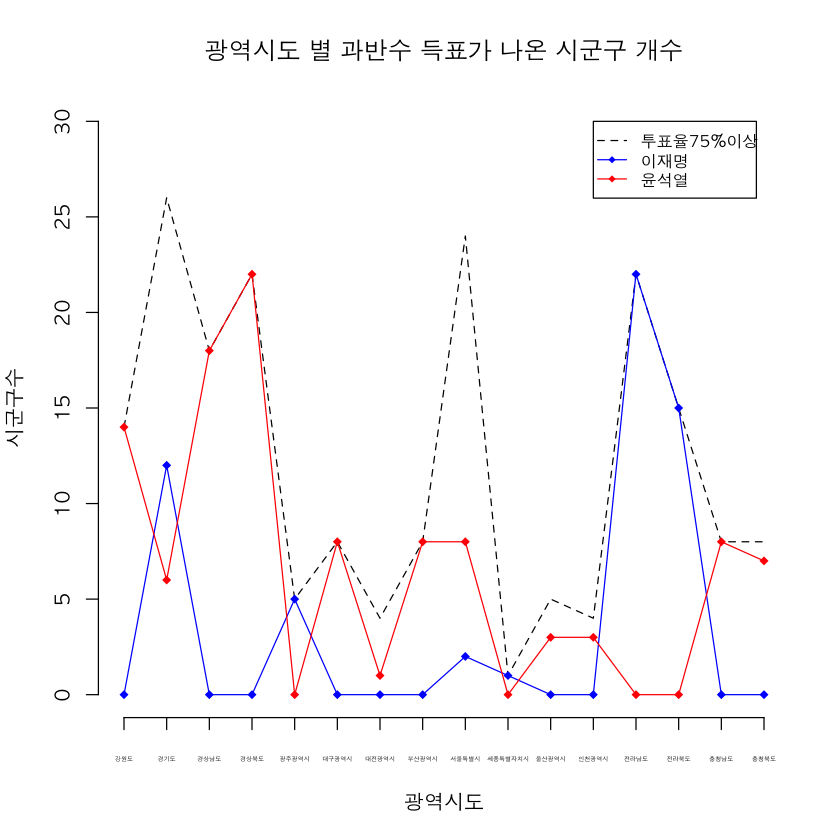

In [4]:

par(family ="AppleGothic", bg='white')
options(warn = -1)
plot(team[1,],
    type='l',
     ylim=c(0,30),
     col='black',
     axes =F, #x,y 좌표 frame 제거
     ann=F, #x,y label 제거
     lty = 2,

    )
# x축과 x축의 라벨을 설정
axis(1, at=1:16, lab=merge2$광역시도,cex.axis=0.3)
# y축과 y축의 라벨을 설정
axis(2, ylim=c(0,30))
# main title 지정
title(main="광역시도 별 과반수 득표가 나온 시군구 개수",col.main="black")

# x축 title(label) 지정
title(xlab="광역시도", col.lab="black")

# y축 title(label) 지정
title(ylab="시군구수", col.lab="black")
lines(team[2,],
      type='o',
       pch=18,
      lty=1,
     col="blue")

lines(team[3,],
      type='o',
       pch=18,
      lty=1,
     col="red")
# 범례
legend(12,30, #x,y 좌표값 (왼쪽위에 해당하는점)
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8  #기본 값이 1 
       
      )

# 깔끔버전

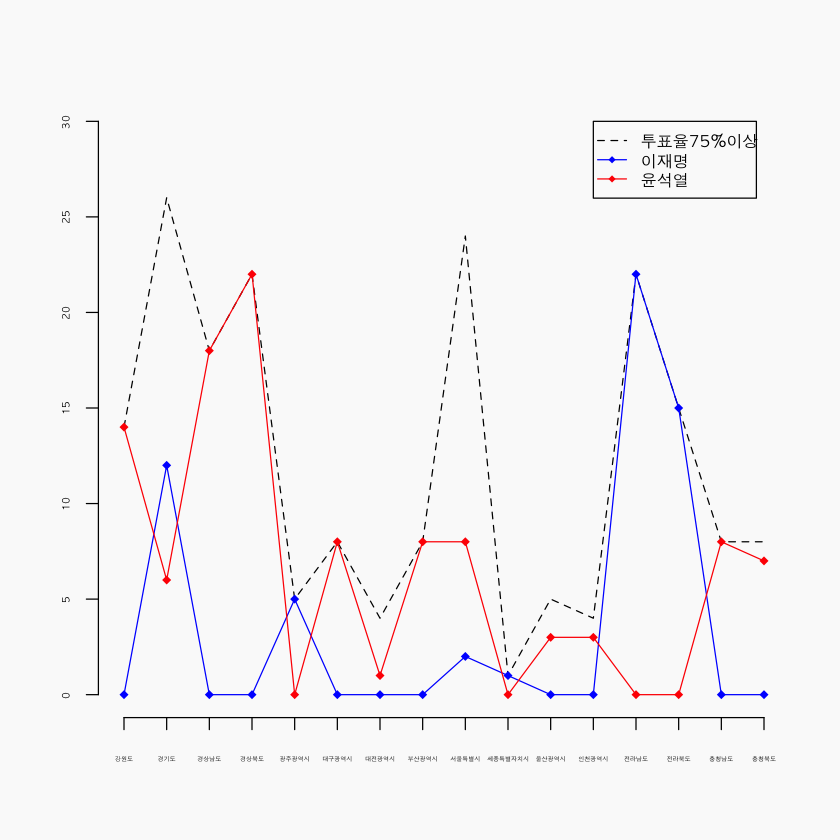

In [8]:
par(family = 'AppleGothic', bg = '#fafafa')

election$투표율 <- election$투표수 / election$선거인수
이재명 <- subset(election, 투표율>=0.75 & 이재명/투표수 > 0.5)
윤석열 <- subset(election, 투표율>=0.75 & 윤석열/투표수 > 0.5)
투표율 <- subset(election, 투표율>=0.75)

차트 <- data.frame(cbind(table(이재명$광역시도), table(윤석열$광역시도), table(투표율$광역시도)))
colnames(차트) <- c('이재명', '윤석열', '투표율')
차트$합계 <- 차트$이재명 + 차트$윤석열 + 차트$투표율
차트 <- subset(차트 , 이재명!= 0 | 윤석열 != 0 | 투표율 != 0 | 합계 != 0) # 모든 조건에 해당하지 않는 값 제거

plot(
    c(차트[,3]),
    main='광역시도 별 과반수 득표가 나온 시군구 갯수',
    type='l',
    ylab='시군구수',
    xlab='광역시도',
    cex.axis = 0.1,
    ylim=c(0,30),
    lty = 2,
    axes =F, #x,y 좌표 frame 제거
    ann=F, #x,y label 제거
   
)
axis(1,at=1:16, lab=colnames(t(차트)), cex.axis=0.3)
axis(2, cex.axis=0.5)

lines(
    c(차트[,1]),
    col='blue',
    type='o',
    pch=18,
    lty=1,
)
lines(
    c(차트[,2]),
    col='red',
    type='o',
    pch=18,
    lty=1,
)
legend(12,30, 
      c("투표율75%이상","이재명","윤석열"),
      col=c("black","blue","red"),
      pch=c(NA,18,18),
      lty=c(2,1,1),
      cex=0.8 
    )